In [1]:
import json, yaml, requests
from datetime import datetime
from dateutil import tz
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn

CONFIG_PATH = "../config/config.yaml"

In [2]:
with open('../newest_ts', 'r') as f:
    newest_ts = f.read()

data_path = f"../data/data_{newest_ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

with open(CONFIG_PATH, "r") as stream:
    config = yaml.safe_load(stream)

TIME_ZONE = config['time_zone']
DATETIME_FORMAT = config['dt_format']

In [3]:
def ts2dt(ts, format=DATETIME_FORMAT):
    dt = (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    # .astimezone(tz.tzlocal())
                    .astimezone(tz.gettz(TIME_ZONE)))
    return dt.strftime(format), dt

_, newest_dt = ts2dt(newest_ts)
print(f"Recent query happens at {newest_dt.strftime(DATETIME_FORMAT)} ({newest_dt.tzname()}).")

Recent query happens at 2021-10-05 05:09:58 (CST).


In [4]:
def degrees_to_cardinal(d):
  dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
  ix = int(round(d / (360. / len(dirs))))
  return dirs[ix % len(dirs)]

In [5]:
# data.keys()

In [6]:
# data['current']

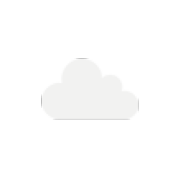

Today, sun rises at 06:15 and sets at 18:07.
Currently, the weather is Clouds (scattered clouds).
The temperature is 28.61°C and it feels like 33.68°C.
The UV index is 0, humidity is 80%.
The pressure is 1010 hPa, percentage of cloud cover is 37%
The wind comes from ENE direction with a speed 4.02 m/s.


In [7]:
current = data['current']

fig, ax = plt.subplots(figsize=(3, 3))
icon = requests.get(f"http://openweathermap.org/img/wn/{current['weather'][0]['icon']}@2x.png")
im = Image.open(BytesIO(icon.content))
plt.imshow(im)
ax.set_axis_off()
plt.show()

print(f"Today, sun rises at {ts2dt(current['sunrise'], '%H:%M')[0]} \
and sets at {ts2dt(current['sunset'], '%H:%M')[0]}.\n\
Currently, the weather is {current['weather'][0]['main']} ({current['weather'][0]['description']}).\n\
The temperature is {current['temp']}°C and it feels like {current['feels_like']}°C.\n\
The UV index is {current['uvi']}, humidity is {current['humidity']}%.\n\
The pressure is {current['pressure']} hPa, percentage of cloud cover is {current['clouds']}%\n\
The wind comes from {degrees_to_cardinal(current['wind_deg'])} direction with a speed {current['wind_speed']} m/s.")

In [8]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

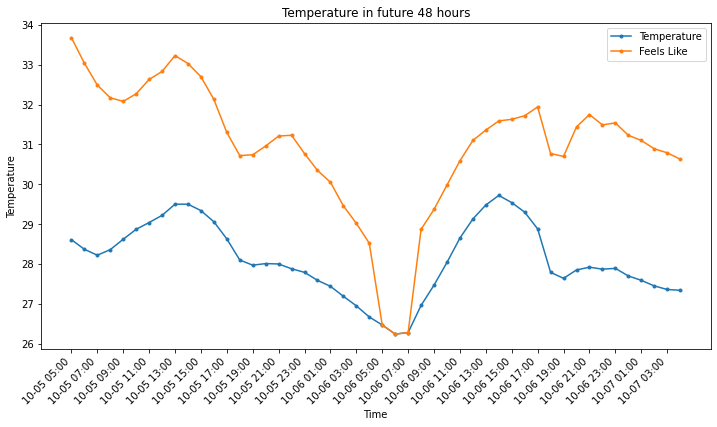

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-', label='Temperature')
plt.plot(df_hourly.feels_like, '.-', label='Feels Like')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M')[0] for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
ax.locator_params(nbins=15, axis='y')
plt.legend()
plt.show()

In [10]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1633381200,28.61,33.68,1010,80,24.82,0.00,37,10000,8.08,79,9.91,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.22,NaN
1,1633384800,28.37,33.04,1010,80,24.58,0.00,38,10000,8.04,76,9.91,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.33,{'1h': 0.13}
2,1633388400,28.22,32.49,1011,79,24.23,0.14,38,10000,8.03,71,10.29,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.08,NaN
3,1633392000,28.36,32.17,1012,75,23.50,0.92,35,10000,8.47,67,11.04,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.08,NaN
4,1633395600,28.62,32.08,1012,71,22.84,2.70,10,10000,8.68,67,10.93,"[{'id': 800, 'main': 'Clear', 'description': '...",0.00,NaN
